# HW 06

## 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

### Simple Linear Regression

### <center> $Y_{i}$ = $β_{0}$ + $β_{1}$$x_{i}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$) </center>

**Independant Variable / Outcome ($Y_{i}$)** - The y value of the point, which represents the observed outcome.

**Dependant Variable / Explanatory ($x_{i}$)** - The x value of the point, which represents the aspect of the data point. 

**Intercept ($β_{0}$)** - The y intercept of the line, meaning when $x_{i}$ = 0, $Y_{i}$ would be equal to $β_{0}$ if not for error.

**Slope ($β_{1}$)** - The slope of the line. Along with the intercept, it displays the relationship between the explanatory variable and the outcome ($x_{i}$ and $Y_{i}$)

**Error ($ε_{i}$)** - The error of the model, compared to observed values. This number follows a normal distribution in which the mean is 0 and the standard deviation is called "$σ^{2}$".

### Example of Simple Linear Regression

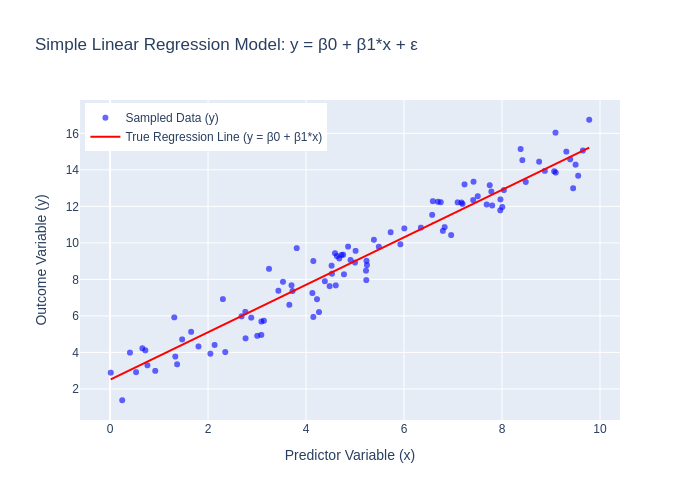

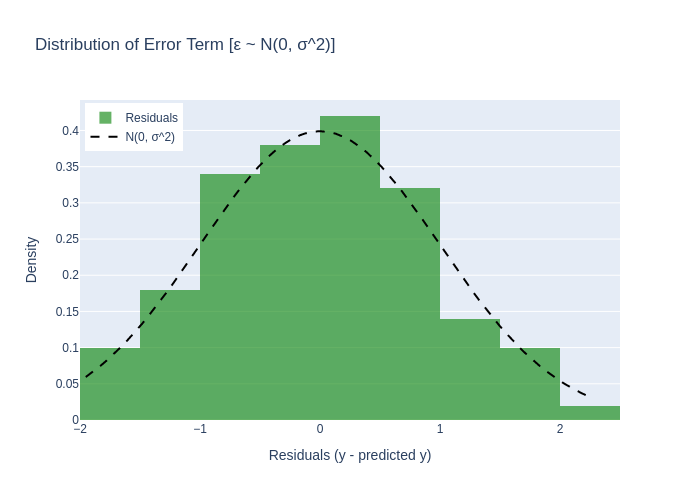

In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

# Parameters of the theoretical model
beta_0 = 2.5  # Intercept
beta_1 = 1.3  # Slope
sigma = 1.0 # Standard deviation of the error term

# Generating predictor data (x) and error term (epsilon)
np.random.seed(7)
x = np.random.uniform(0, 10, 100)  # 100 values between 0 and 10
epsilon = np.random.normal(0, sigma, 100)  # Normally distributed errors

# Outcome variable (y) based on the theoretical model
y = beta_0 + beta_1 * x + epsilon

# Creating the scatter plot with the true regression line
fig1 = go.Figure()

# Add the scatter plot of sampled data points
fig1.add_trace(go.Scatter(
    x=x, y=y, mode='markers',
    name='Sampled Data (y)',
    marker=dict(color='blue', opacity=0.6)
))

# Add the theoretical regression line
fig1.add_trace(go.Scatter(
    x=x, y=beta_0 + beta_1 * x,
    mode='lines', name='True Regression Line (y = β0 + β1*x)',
    line=dict(color='red')
))

# Updating layout for the first figure
fig1.update_layout(
    title='Simple Linear Regression Model: y = β0 + β1*x + ε',
    xaxis_title='Predictor Variable (x)',
    yaxis_title='Outcome Variable (y)',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)
fig1.show(renderer="png")

# Plotting the distribution of residuals (error terms)
residuals = y - (beta_0 + beta_1 * x)  # residuals are (y - predicted y)

# Creating the histogram for residuals
fig2 = go.Figure()

# Add the histogram of residuals
fig2.add_trace(go.Histogram(
    x=residuals, histnorm='probability density',
    name='Residuals', opacity=0.6,
    marker=dict(color='green')
))

# Adding the expected normal distribution curve
x_vals = np.linspace(residuals.min(), residuals.max(), 100)
fig2.add_trace(go.Scatter(
    x=x_vals, y=norm.pdf(x_vals, 0, sigma),
    mode='lines', name='N(0, σ^2)',
    line=dict(color='black', dash='dash')
))

# Updating layout for the second figure
fig2.update_layout(
    title='Distribution of Error Term [ε ~ N(0, σ^2)]',
    xaxis_title='Residuals (y - predicted y)',
    yaxis_title='Density',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)
fig2.show(renderer="png")

### Summary of Interaction

In this conversation, we explored the theoretical Simple Linear Regression model, focusing on its components: predictor variable xx, outcome variable yy, slope (β1β1​), intercept (β0β0​), and error term ϵϵ. The model is expressed as y=β0+β1x+ϵy=β0​+β1​x+ϵ, where ϵ∼N(0,σ2)ϵ∼N(0,σ2), meaning the error follows a normal distribution with mean 0 and variance σ2σ2. We discussed the role of xixi​ as a continuous variable, which can take on infinite values within a range, differentiating it from discrete variables and allowing for smooth variations in xx when modeling its relationship with yy. A Python simulation using numpy and scipy.stats was provided to illustrate these concepts.

https://chatgpt.com/share/67241777-7b34-8012-a184-b0607848f1b5

## 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf



In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf  # Library for specifying and fitting statistical models

# Parameters for the theoretical model
beta_0 = 2.5  # Intercept
beta_1 = 1.3  # Slope
sigma = 1.0  # Error term standard deviation

# Generating data
np.random.seed(7)
x = np.random.uniform(0, 10, 100)  # 100 values from 0 to 10
epsilon = np.random.normal(0, sigma, 100)  # Normally distributed error

# Defining outcome variable (y) based on model
y = beta_0 + beta_1 * x + epsilon
df = pd.DataFrame({'x': x, 'Y': y})

print(df)

           x          Y
0   0.763083   3.295980
1   7.799188  12.048174
2   4.384092   7.899609
3   7.234652  13.201933
4   9.779895  16.743443
..       ...        ...
95  4.757645   9.350142
96  7.967610  12.379475
97  7.172422  12.209536
98  1.471476   4.713599
99  6.587483  12.283046

[100 rows x 2 columns]


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1504.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           2.91e-61
Time:                        19:17:52   Log-Likelihood:                -131.46
No. Observations:                 100   AIC:                             266.9
Df Residuals:                      98   BIC:                             272.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3463      0.199     11.794      0.0

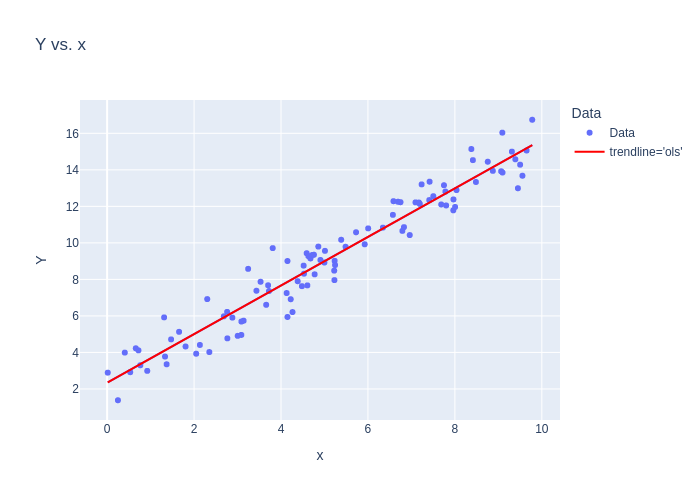

In [3]:
# Specifying and fitting the linear regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # OLS model with Y as outcome, x as predictor
fitted_model = model_data_specification.fit()  # Fits the model

# Exploring the model outputs
print(fitted_model.summary(),
    fitted_model.summary().tables[1],
    fitted_model.params,  
    fitted_model.params.values,  
    fitted_model.rsquared)

# Adding the 'Data' column for legend
df['Data'] = 'Data'  

# Plotting data with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='red'), name="trendline='ols'")

fig.show(renderer="png")  # Display the plot with a static image renderer for compatibility

https://chatgpt.com/share/672b03e7-bf4c-8012-a2fa-26c05a1d1cb5 

## 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

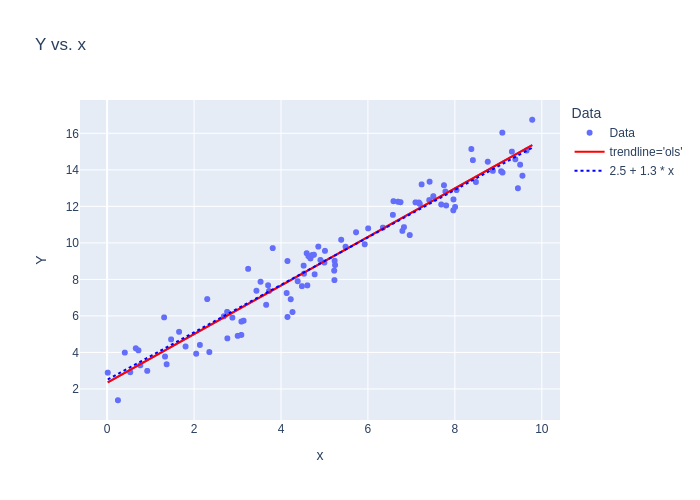

In [4]:
## PREVIOUS CODE

import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf  # Library for specifying and fitting statistical models

# Parameters of the theoretical model
beta_0 = 2.5  # Intercept
beta_1 = 1.3  # Slope
sigma = 1.0 # Standard deviation of the error term

# Generating predictor data (x) and error term (epsilon)
np.random.seed(7)
x = np.random.uniform(0, 10, 100)  # 100 values between 0 and 10
epsilon = np.random.normal(0, sigma, 100)  # Normally distributed errors

# Outcome variable (y) based on the theoretical model
y = beta_0 + beta_1 * x + epsilon

# Parameters for the theoretical model
beta_0 = 2.5  # Intercept
beta_1 = 1.3  # Slope
sigma = 1.0  # Error term standard deviation

# Generating data
np.random.seed(7)
x = np.random.uniform(0, 10, 100)  # 100 values from 0 to 10
epsilon = np.random.normal(0, sigma, 100)  # Normally distributed error

# Defining outcome variable (y) based on model
y = beta_0 + beta_1 * x + epsilon
df = pd.DataFrame({'x': x, 'Y': y})

# Specifying and fitting the linear regression model
model_data_specification = smf.ols("Y ~ x", data=df)  # OLS model with Y as outcome, x as predictor
fitted_model = model_data_specification.fit()  # Fits the model

# Adding the 'Data' column for legend
df['Data'] = 'Data'  

# Plotting data with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='red'), name="trendline='ols'")

# ADDITION OF THE ORIGINAL MODEL LINE

x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * x', 
                line=dict(dash='dot', color='blue'))

fig.show(renderer="png")

The difference between the lines is that the theoretical model line represents the actual relationship between x and y, without any influence from random sampling variation. On the other hand, the fitted OLS line shows the relationship as estimated from the simulated dataset, which includes random sampling variation because of the added error. This OLS line fits to the specific sample data, providing a best-fit approximation of the theoretical model.

Essentially, the OLS trend line is a prediction of the dotted blue line, which is the actual relationship between X and Y. 

### Summary of Interaction

In this conversation, we discussed your linear regression model and its visualization. You generated data based on a theoretical model, then fit it to a linear regression using OLS. Theoretical and fitted regression lines were compared. The theoretical line represents the ideal relationship without random sampling variation, while the fitted OLS line reflects the best approximation of the model based on the data, including random noise. We also clarified the phrase "simulation of random sampling variation," which refers to the randomness introduced in real-world data. Finally, you adjusted your plot to avoid duplicating the original model line in the legend.

https://chatgpt.com/share/672b0d95-848c-8012-b953-3a1d32dfcf14

## 4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

If you have a data set with x and y variables, you can create a fitted linear regression models using methods such as the OLS method. This model will have two paramaters, the slope and the y intercept, as a linear model will take the form of line equation.

The fitted_model.params or fitted_model.params.values calculate and return the fitted model parameters, which are estimations of the actual model given by
<center> $Y_{i}$ = $β_{0}$ + $β_{1}$$x_{i}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$) </center>

From here, the fitted_model.fittedvalues are calculated by inputting the original x values into this fitted model equation, to acquire the fitted y values. It is notable that these fitted y values will NOT all be the same as your original y values, as if they were, the line of best fit would be perfect and there would be no residuals (differences between the observed y values and the line of best fit).

### Summary of Interaction

In this conversation, we discussed how fitted_model.summary().tables[1] in statsmodels shows detailed statistics of a regression model’s coefficients, such as their values, standard errors, t-values, and p-values. Coefficients represent the relationship between predictor variables and the response variable. In-sample predictions use the fitted model’s estimated coefficients to predict yy values for the training data, which differ from the theoretical model due to residuals, or errors, in the model’s fit. Predicted yy values generally won't match actual yy values because of this noise and variability in the data.

https://chatgpt.com/share/672bfaa1-1ebc-8012-a5c5-44d4f6eba4af

## 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

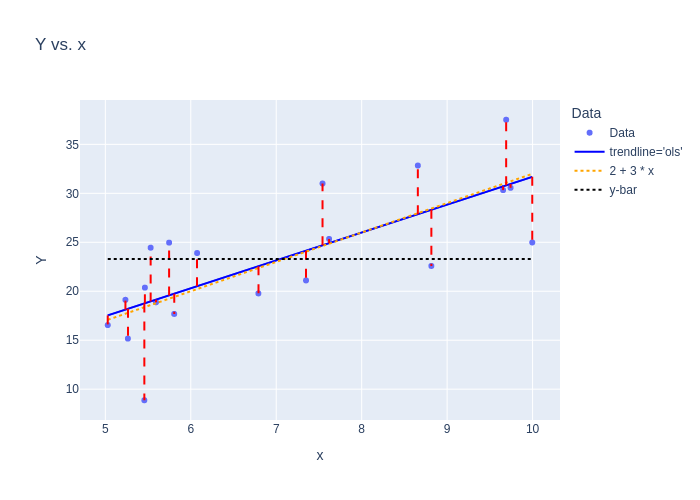

In [10]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")

### The line of best fit and OLS

The goal when creating a fitted linear model is to see if X can predict Y.

The first step is to take your data and draw any line through it. Measure the distance from the data points to the lines. These are the residuals. Then, you sum up the squares of these residuals. They are squared because:
- Squaring makes the magnitude of the residuals larger, which is useful when trying to find the line which creates the LEAST residuals.
- It gets rid of negative residual values, which would cause problems when summing the squares.

To get a better fit line, you would rotate the line until you get the smallest sum of least squares (RSS). The line that creates the smallest RSS is the line of best fit.

## 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

    1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
    fitted_model.rsquared
    np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
    np.corrcoef(Y,x)[0,1]**2
    
### Understanding R^2
$R^{2}$ is a measure of how good of a prediction the linear model is. In others words, it tells you how much of the variation in Y can be attributed to changes in X.

To get $R^{2}$, you would first only regard the Y (outcome). 
- Calculate the average in the Y values and then get the sum of the squares of the residuals to the mean (SSM). SSM = (data-mean)^2

Then, return to the fitted model
- Calculate the sum of the squared residuals of the fitted model (SSF). SSF = (data-line)^2

When SSF<SSM, we can say that some of the variation in Y is due to the change in X. **This is because there is a decrease in the variation of the data when we take X into account.** $R^{2}$ is the quantification of this.
- $R^{2}$ = (SSM - SSF)/SSM
- This will give a decimal, which can be converted to be a percentage. X explains __% of the variation in Y

### The Code

1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()**
 
- This line of code is essentially the above equation for $R^{2}$, except with 1 factored out, leaving the equation "1-(SSF/SSM)". As explained above, this is the quantification of how much of the variation in Y can be attributed to the changes in X.

fitted_model.rsquared
- This line of code is a build in property that calculates the same value of $R^{2}$. Since $R^{2}$ is defined as the proportion of variance in the dependent variable Y explained by X in the model, fitted_model.rsquared effectively quantifies the model’s accuracy in capturing the patterns in Y. A higher $R^{2}$ means that the model does a better job of explaining the variance in Y, making it measure of the model’s accuracy.

np.corrcoef(Y,fitted_model.fittedvalues)[0,1]****2**
- The function "np.corrcoef" computes the correlation matrix between two variables. In this case, Y and the model’s fitted values, fitted_model.fittedvalues. In simple linear regression, $R^{2}$ is equal to the square of the correlation between Y and the model’s predictions (fitted values), capturing how closely the predicted values match the actual outcomes.

np.corrcoef(Y,x)[0,1]****2**
- Similar to the above line of code, this line calculates the correlation between the X and Y variables. In linear regression, this line will give the same value as np.corrcoef(Y,fitted_model.fittedvalues)[0,1]****2**, which is also the same as $R^{2}$

Essentiall, all 4 lines of code are different ways to calculate $R^{2}$ in the context of linear regression.

### Summary of Interaction with Chat

In this conversation, we explored how various expressions measure the goodness of fit in a Simple Linear Regression model by capturing the proportion of variance in the outcome YY explained by the model. Specifically, we examined the expression 1−RSSTSS1−TSSRSS​, fitted_model.rsquared, and np.corrcoef(Y, fitted_model.fittedvalues)[0,1]****2**, noting that all three yield the model’s R2R2, which quantifies how well the model explains YY. We also discussed how np.corrcoef(Y, x)[0,1]****2** and np.corrcoef(Y, fitted_model.fittedvalues)[0,1]****2** give the same R2R2 in simple linear regression since the fitted values are directly related to xx, but this equivalence does not extend to multiple regression.

https://chatgpt.com/share/672bf134-eb80-8012-bed8-cabad04c4dcf

## 7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

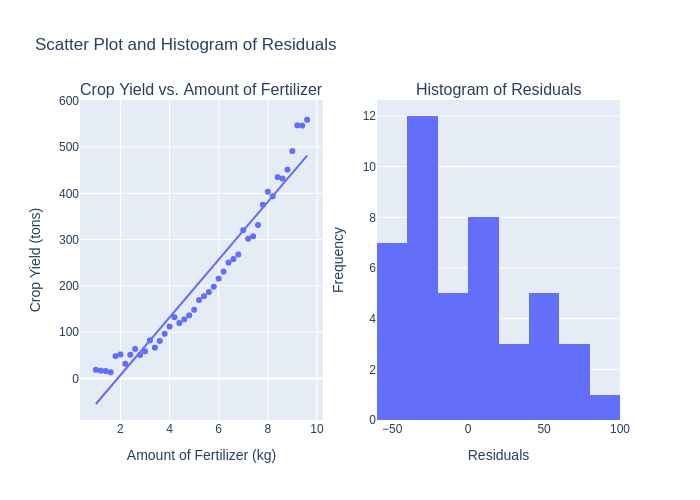

In [12]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

The two assumption that are made by this SLR model are that:
- **The line of best fit is linear** - Simple linear regression assumes that the line of best fit is a straight line. However, judging by the scatterplot of this data set, the relationship between the x and y variables seems to be exponential. For this reason, a SLR model may not be the most accurate way to predict the y variable
- **The variance of the residuals** - The SLR model assumes that the residuals have a normal distribution, with the mean being 0. However, the histogram of the residuals of this data seems to follow the shape of a gamma distribution. This is another reason that the SLR model may not be the best for this data set.

### Summary of Interaction

In this conversation, we discussed two key assumptions in simple linear regression regarding the residuals. First, we clarified that normality means the residuals follow a bell-shaped distribution, while constant variance (homoscedasticity) means the residuals have the same spread across all levels of the independent variable. These two assumptions are compatible because the normal distribution can still have a constant variance, meaning the residuals are symmetrically distributed with a consistent degree of spread around the regression line. This ensures the reliability of regression estimates and hypothesis tests.

https://chatgpt.com/share/672c027e-e040-8012-89bc-5f7ef4459b8c

# Data for 8-13

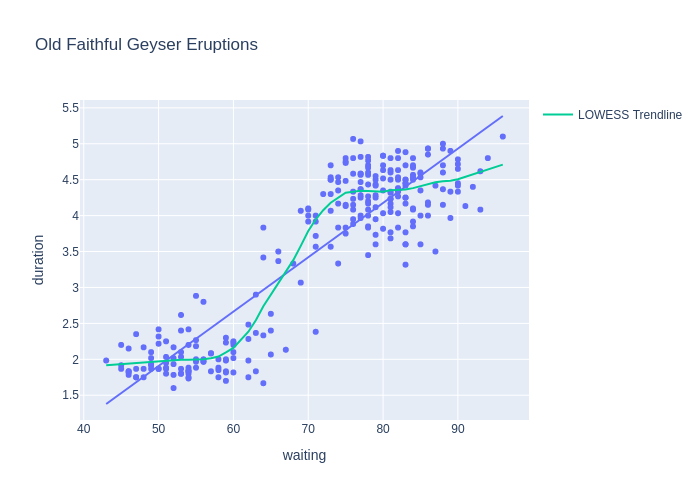

In [13]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

## 8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

The null hypothesis that there is no linear association between the independant and dependant variables would mean that the model's line would have no slope. Therefore:

##### <center> $H_{0}$: $β_{1}$ = 0 </center>

By examining the p value, we can determine the evidence against this hypothesis, therefore implying that the line does have some slope.

In [2]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Specify the linear regression model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the fitted model
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:02:49   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

From examining the table above, we can see that the p value for the independant variable, the waiting time, is 0.000. The number is actually not 0, however it is not displayed on this table. We can access it using the following code:

In [11]:
# Accessing the full p-value for the 'waiting' coefficient
p_value_waiting = fitted_model.pvalues['waiting']
print(f"Full p-value for 'waiting': {p_value_waiting}")

Full p-value for 'waiting': 8.129958506618397e-100


As shown above, the p-value is extremely small, which is in the range of very strong evidence against the null hypothesis. From this, we can conclude that there is some linear relationship between the X ad Y variables. 

### Summary of Interaction

We discussed hypothesis testing in the context of a linear regression analysis on the Old Faithful Geyser dataset, focusing on the null hypothesis that there is no linear relationship between waiting time and duration. The p-value, shown as 0.000 in the summary table, indicates a very small value, suggesting strong evidence against the null hypothesis. I explained that the p-value labeled as P>|t| relates to the t-statistic, which tests if the coefficient of an independent variable is significantly different from zero. Additionally, I provided guidance on how to extract the full p-value for more precision.

https://chatgpt.com/share/672d1676-0d90-8012-8480-a13298c42366

## 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


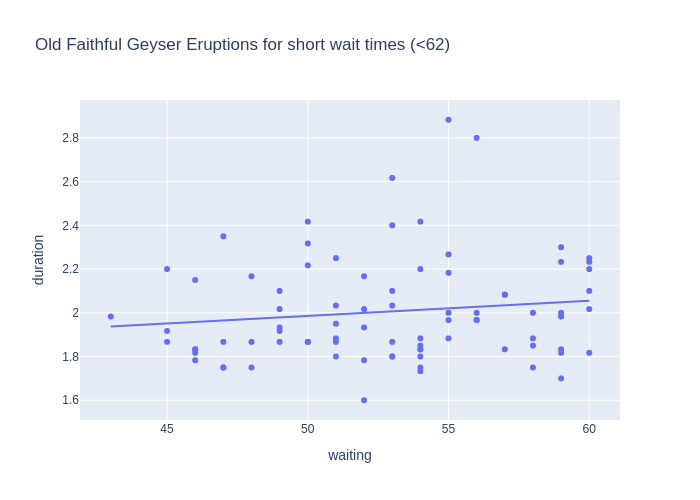

In [3]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

When only viewing the shorter weight times, there is no evidence against the null hypothesis that $β_{1}$ = 0. This is because the p value for the waiting time is 0.238, which means p > 0.1, and there is therefore no evidence. Therefore, we cannot be sure that the slope of the relationship is not 0.

## 10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

1. create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

2. simulate samples (of size n=160) from a Simple Linear Regression model that uses $β_{0}$ = 1.65 and $β_{1}$ = 0, σ = 0.37 along with the values of waiting for to create simuations of Y and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)"; then,

3. report if 0 is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


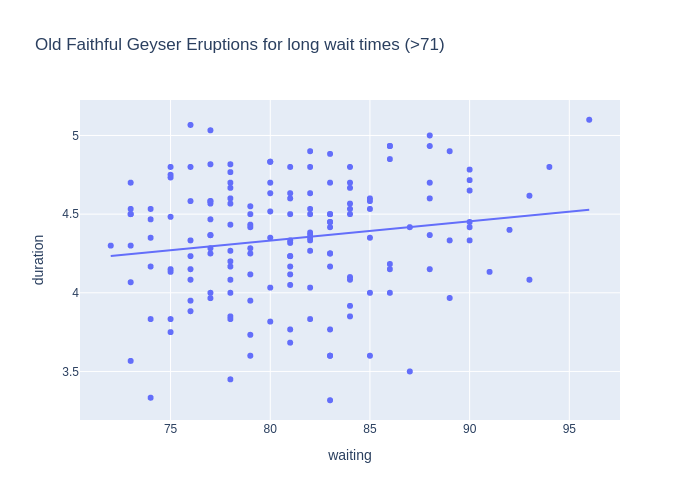

In [58]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for long wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

### 1. create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

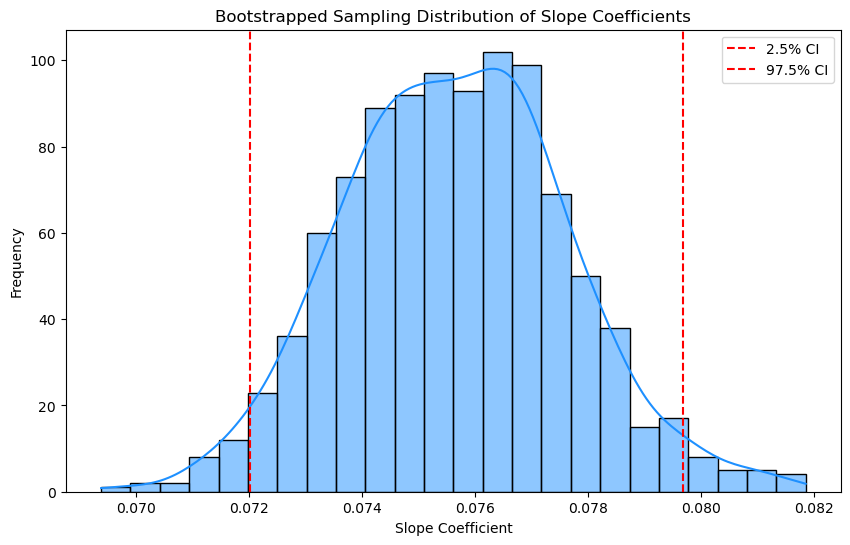

In [14]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Number of bootstrap samples
n_bootstrap = 1000
slope_coefficients = []

# Perform bootstrapping
for i in range(n_bootstrap):
    sample = old_faithful.sample(frac=1, replace=True) # get a random sample, with replacement
    model = smf.ols('duration ~ waiting', data=sample).fit() # get a fitted linear regression model of the sample
    slope_coefficients.append(model.params['waiting']) # extract the slope parameter   
    
# Plot the distribution of bootstrapped slope coefficients
plt.figure(figsize=(10, 6))
sns.histplot(slope_coefficients, kde=True, color='dodgerblue')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.axvline(np.percentile(slope_coefficients, 2.5), color='red', linestyle='--', label='2.5% CI')
plt.axvline(np.percentile(slope_coefficients, 97.5), color='red', linestyle='--', label='97.5% CI')
plt.legend()
plt.show()

### 2. simulate samples (of size n=160) from a Simple Linear Regression model that uses β0 = 1.65 and β1 = 0, σ = 0.37 along with the values of waiting for x to create simuations of Y and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)";

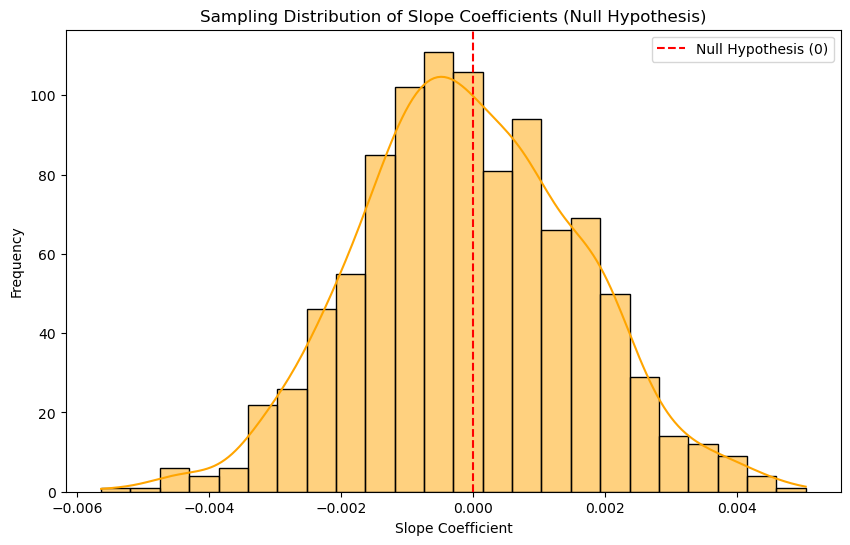

In [10]:
import pandas as pd

# Parameters for null hypothesis simulation
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
n_samples = 160  # Size of each simulated sample

null_slope_coefficients = []

# Simulate n_samples
for i in range(n_bootstrap):
    y_simulated = beta_0 + beta_1 * old_faithful['waiting'] + np.random.normal(0, sigma, size=len(old_faithful))
    sample_data = pd.DataFrame({'waiting': old_faithful['waiting'], 'duration': y_simulated})
    model = smf.ols('duration ~ waiting', data=sample_data).fit()
    null_slope_coefficients.append(model.params['waiting'])

# Visualize the distribution under the null hypothesis
plt.figure(figsize=(10, 6))
sns.histplot(null_slope_coefficients, kde=True, color='orange')
plt.title('Sampling Distribution of Slope Coefficients (Null Hypothesis)')
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Null Hypothesis (0)')
plt.legend()
plt.show()

### 3. report if 0 is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]?

In [16]:
# Calculate 95% confidence interval for bootstrapped distribution
ci_lower = np.percentile(slope_coefficients, 2.5)
ci_upper = np.percentile(slope_coefficients, 97.5)
print(f"95% Bootstrapped Confidence Interval for the slope: ({ci_lower:.4f}, {ci_upper:.4f})")

# Check if 0 is in the confidence interval
contains_zero = (ci_lower <= 0 <= ci_upper)
print("Does the 95% confidence interval contain 0?", contains_zero)

# Fit actual model to get p-value
model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
p_value_actual = model.pvalues['waiting']
print(f"Actual p-value from smf.ols: {p_value_actual:.4g}")

# Compare with simulated p-value
simulated_p_value = (np.sum(np.array(null_slope_coefficients) >= np.mean(slope_coefficients)) / n_bootstrap)
print(f"Simulated p-value: {simulated_p_value:.4g}")

95% Bootstrapped Confidence Interval for the slope: (0.0720, 0.0797)
Does the 95% confidence interval contain 0? False
Actual p-value from smf.ols: 0.03814
Simulated p-value: 0


- 0 is not contained within the 95% bootstrapped confidence interval.
- The simulated p value (0 )does not match smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1] (0.381)

### Summary of the Interaction

In this conversation, we discussed the process of performing a statistical analysis on the relationship between the waiting time and duration of eruptions of the Old Faithful Geyser. The analysis involved fitting a simple linear regression model, followed by simulating the null hypothesis that there is no relationship between the variables (i.e., β1=0β1​=0). We explored the concept of bootstrapping to estimate the variability of the slope coefficient and how simulating the null hypothesis helps us create a distribution of slopes under the assumption that there is no relationship. The p-value was calculated by comparing the observed slope to the distribution of slopes generated under the null hypothesis. This allowed us to assess whether the observed slope is statistically significant and whether it is unlikely to have occurred by chance under the assumption of no relationship.

https://chatgpt.com/share/672d31d7-dc94-8012-a88e-713b742ad812

## 11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length

### <center> $Y_{i}$ = $β_{intercept}$ + $1_{"long"}$$k_{i}$$β_{contrast}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$) </center>
## where we use $k_{i}$ (rather than $x_{i}$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications

1. smf.ols('duration ~ waiting', data=old_faithful)
2. smf.ols('duration ~ waiting', data=old_faithful[short_wait])
3. smf.ols('duration ~ waiting', data=old_faithful[long_wait])

## and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


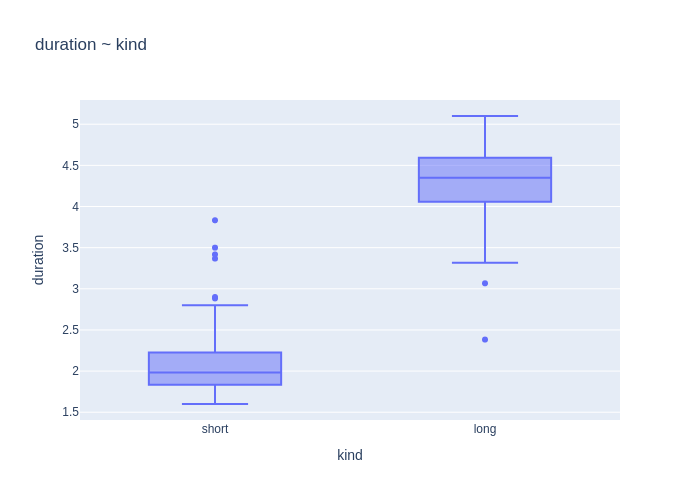

P-value for 'long' category: 1.599856531005988e-121


In [59]:
from IPython.display import display

# Fit the model
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary of the regression results
display(model.summary().tables[1])

# Box plot for duration by kind (short vs long)
fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

# Extract and print the p-value for the "long" category
p_value_long = model.pvalues['C(kind, Treatment(reference="short"))[T.long]']
print(f"P-value for 'long' category: {p_value_long}")

### The Equation
The equation $Y_{i}$ = $β_{intercept}$ + $1_{"long"}$$k_{i}$$β_{contrast}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$) compares the difference between the averages of the two groups, the "short" and the "long". 
- For a short value ($k_{i}$=0), the equation becomes $Y_{i}$ = $β_{intercept}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$)
- For a long value ($k_{i}$=1), the equation becomes $Y_{i}$ = $β_{intercept}$ + $β_{contrast}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$)

This highlights the difference between the groups through the variable "$β_{contrast}$"

### The difference

1.  **smf.ols('duration ~ waiting', data=old_faithful)** - This equation modelled the linear relationship between waiting and duration, in which waiting was as continuous variable that held many numeric values. In the new equation, the $x_{i}$ variable is replaced with $k_{i}$, as we are no longer dealing with a continous, numeric variable. We are now strictly working with two categories.
2. **smf.ols('duration ~ waiting', data=old_faithful[short_wait]) and smf.ols('duration ~ waiting', data=old_faithful[long_wait])** - These models were the same as the above, however they dealt with the numeric variable of $x_{i}$ within one of the two subsets/categories of long or short. These examined the relationships between the X and Y within those subsets, as opposed to the new equation which examines the difference in mean between the two subsets.

### Evidence against the null

The null in this situation would be that $β_{contrast}$ = 0, implying that there is no difference in the mean values of the long and short categories. However, judging by the box plots created, it is very clear that there is a significant difference between the two means. Furthermore, the p value associated with the $β_{contrast}$ parameter is an extremely small number, meaning we have very strong evidence against the null hypothesis.

### Summary of Interaction

In this conversation, you were working with an OLS regression model to compare the duration of eruptions between "short" and "long" wait times using the old_faithful dataset. You were specifically interested in extracting and interpreting the p-value for the "long" category, which indicates whether the difference in average durations between "short" and "long" wait times is statistically significant. There was some confusion about the use of the indicator variable 1_{long} and k_i in the model, but that was clarified by explaining that they serve similar functions, with 1_{long} being shorthand for indicating "long" wait times. We also discussed how the p-value under the term "C(kind, Treatment(reference='short'))" in the regression output is what you're looking for to determine the statistical significance of the difference between the two groups. Additionally, I provided the corrected code for extracting the p-value, as the original code had a syntax issue.

https://chatgpt.com/share/672d3ed8-b310-8012-973e-d30db1e59992

## 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

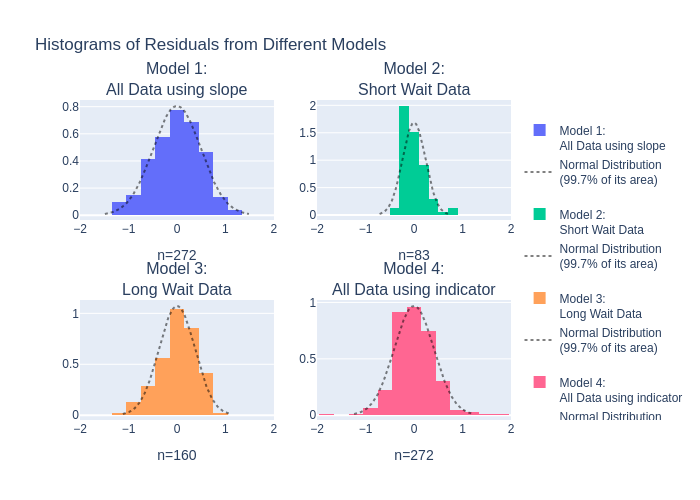

In [57]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

The histogram that suggests the plausibility of the assumption that the distribution of error terms is normal is Model 1. The curve of the graph fits the normal distribution much more accurately than the other three. The other three graphs have a skew that makes them not very normally distributed.

## 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.
1. Do a permuation test $H_{0}$: $μ_{short}$ = $μ_{long}$ no difference in duration between short and long groups by "shuffling" the labels
2. Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to the collection of differences between the sample means.
3. Explain how the sampling approaches work for the two simulations.
4. Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different

### 1.

In [53]:
import numpy as np

# Define the observed test statistic: the difference in means
observed_diff = old_faithful[old_faithful['waiting'] <= old_faithful['waiting'].median()]['duration'].mean() - \
                             old_faithful[old_faithful['waiting'] > old_faithful['waiting'].median()]['duration'].mean()

# Perform the permutation test
n_permutations = 10000
permuted_diffs = []

# Shuffle the labels and calculate the difference in means
for _ in range(n_permutations):
    shuffled = old_faithful.copy()
    shuffled['waiting'] = np.random.permutation(shuffled['waiting'])
    
    short_group = shuffled[shuffled['waiting'] <= shuffled['waiting'].median()]['duration']
    long_group = shuffled[shuffled['waiting'] > shuffled['waiting'].median()]['duration']
    
    permuted_diff = short_group.mean() - long_group.mean()
    permuted_diffs.append(permuted_diff)

# Calculate p-value and display with full precision
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Display p-value with full decimal precision
print(f"P-value: {p_value:.10f}")


P-value: 0.0000000000


The p value is 0, meaning we have very strong evidence against the null hypothesis. This means that in a world where having a short or long wait time is irrelevant, it would be extremely unlikely for us to observe the data that we have.

### 2.


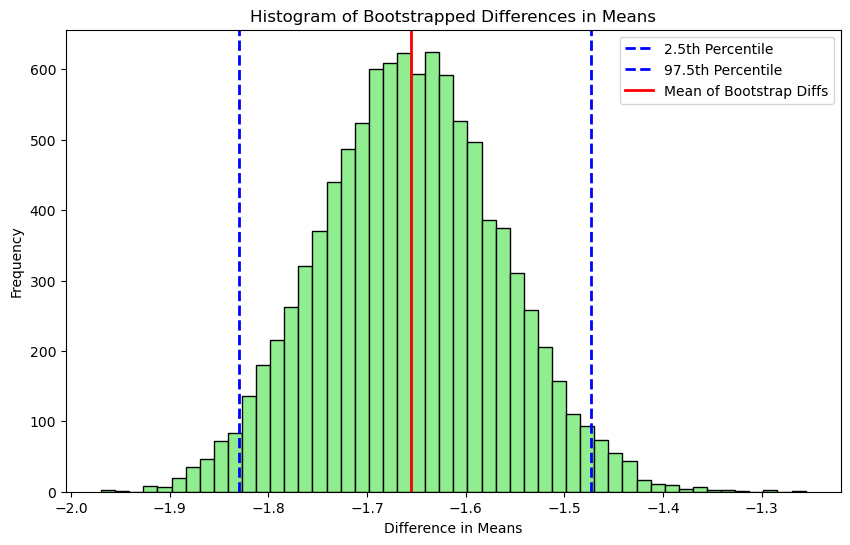

array([-1.83007732, -1.47297896])

In [56]:
# Resampling within each group and computing the difference in means
n_bootstrap = 10000
bootstrap_diffs = []

for _ in range(n_bootstrap):
    short_sample = np.random.choice(old_faithful[old_faithful['waiting'] <= old_faithful['waiting'].median()]['duration'], 
                                   size=len(short_group), replace=True)
    long_sample = np.random.choice(old_faithful[old_faithful['waiting'] > old_faithful['waiting'].median()]['duration'], 
                                  size=len(long_group), replace=True)
    
    bootstrap_diff = short_sample.mean() - long_sample.mean()
    bootstrap_diffs.append(bootstrap_diff)

# Calculate the 95% confidence interval
conf_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])

import matplotlib.pyplot as plt

# Plotting the histogram of bootstrapped differences
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_diffs, bins=50, color='lightgreen', edgecolor='black')
plt.axvline(conf_interval[0], color='blue', linestyle='--', linewidth=2, label='2.5th Percentile')
plt.axvline(conf_interval[1], color='blue', linestyle='--', linewidth=2, label='97.5th Percentile')
plt.axvline(np.mean(bootstrap_diffs), color='red', linestyle='-', linewidth=2, label='Mean of Bootstrap Diffs')
plt.title('Histogram of Bootstrapped Differences in Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

conf_interval

The above confidence interval is also strong evidence against the null hypothesis, as a difference of 0 is not within the interval.

### 3. 

**Permutation Test** - This test takes the data and applies the labels of "short" or "long" to each row, based on its wait time. From here, we shuffle the "short" and "long" labels randomly, to imagine a world where these labels don't matter. Then we randomly sample from this new "shuffled" data set.

**Bootstrapping** - The sampling method in bootstrapping is more straight forward as we just sample randomly, with replacement. Each boostrapped sample should have the same number of data points (n) as the original. Doing this many times creates several simualted samples, from which we can calculate the mean differences between the "short" values and the "long" values.

### 4.

The indicator variable model was another method to understand the difference in means between the "short" and "long" variables. As previously explained, the equation $Y_{i}$ = $β_{intercept}$ + $1_{"long"}$$k_{i}$$β_{contrast}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$) compares the difference between the averages of the two groups, the "short" and the "long". 
- For a short value ($k_{i}$=0), the equation becomes $Y_{i}$ = $β_{intercept}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$)
- For a long value ($k_{i}$=1), the equation becomes $Y_{i}$ = $β_{intercept}$ + $β_{contrast}$ + $ε_{i}$ where $ε_{i}$ = N(0,$σ^{2}$)

This highlights the difference between the groups through the variable "$β_{contrast}$"

Essentially, this method views the difference in the means of the groups as a parameter of a linear regression model ($β_{contrast}$).

All three methods are useful to understand the difference between the means of the two groups. The indicator variable model and the permutation test are similar as they provide a p value that can be interpreted as evidence against the fact that there is no difference in the means. In contrast, bootstrapping provides us with an inference of what the actual difference is. 

### Summary of Interaction

In this conversation, we started with your code for analyzing the Old Faithful geyser dataset by generating scatter plots with regression lines. You wanted to understand why the p-value from your permutation test showed as 0.0 and ensure the output displayed all decimal places. We discussed potential reasons for obtaining a p-value of 0, which typically indicates strong evidence against the null hypothesis due to the permutation distribution not matching the observed difference.

You then requested code for creating a histogram to visualize the distribution of bootstrapped differences in means, and we explored how p-values are calculated in permutation tests. Finally, we compared indicator variable models, permutation tests, and bootstrapping, outlining their similarities, differences, strengths, and applications.

https://chatgpt.com/share/672d5985-5798-8012-802e-048d4adf4f83

## 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

yes